#### **Alumno**: Nicolás Delgado Lorino


# CASO FAIRNESS

Los campos del dataset FAIRNESS son los siguientes:

- COD_PERSONA	Identificador cliente
- COD_EDAD	Edad cliente
- NACIONALIDAD	Nacionalidad cliente
- XTI_GENERO	Género declarado por el cliente
- TIPO INTERÉS OFERTA 1	Tipo interés que se ofrece en el escenario 1
- TIPO INTERÉS OFERTA 2	Tipo interés que se ofrece en el escenario 2
- TIPO INTERÉS OFERTA 3	Tipo interés que se ofrece en el escenario 3
- FEC_ALTA	Fecha de alta del cliente en la entidad
- XTI_IDEFISCO	Identificador fiscal
- FEC_CANCEL	Fecha cancelación cliente si procede
- COD_POSTAL	Código postal
- XSN_ASNEF	Registrado en la BBDD de Morosos ASNEF
- IMP_NOMINA	Importe de Nómina
- IMP_PENSION	Importe de Pensión
- IMP_DESEMPL	Importe de Desempleo

Los datos nos muestran 3 ofertas de precio entre 0 y 1 de un producto dirigido a clientes particulares.
El precio es mejor cuanto más cercano a 1 sea (como por ejemplo las hipotecas, ofrecen un precio de Euribor + 1,5 o Euribor + 0,5... cuanto menor sea el factor que sumamos al Euribor, menor será el interés que tendremos que pagar y, por lo tanto, mejor será la oferta)
Queremos saber qué oferta / ofertas son discriminatorias o qué otros criterios explican cada oferta. ¿Cuál elegiríais si fuérais los dueños del producto? ¿Cuál elegiríais si fuérais el cliente?

#### Abrir el fichero de datos

In [1]:
# YOUR CODE HERE
import pandas as pd
df=pd.read_csv('C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/datos/006/fairness_datos(1).csv')

#### Filtros
- Filtro de particulares:
Como la oferta está dirigida a particulares, no se han de considerar los casos XTI_GENERO=E
Este filtro también se puede realizar a través de la variable XTI_IDEFISCO y que sus valores no sean ni 2 ni 3
- Filtro de clientes cancelados
No tiene sentido incluir a clientes cancelados, así pues, filtraremos a todos los clientes cuya fecha de cancelación no sea 00/00/0000

In [2]:
# Aplicar filtro
df=df.drop(df[df['XTI_GENERO']=="E"].index)
df=df.drop(df[df['FEC_CANCEL']!="00/00/0000"].index)


In [3]:
df.shape

(938, 15)

In [4]:
df['IMP_PENSION'].unique()

array([   0.,  600., 1000., 1800.,   nan, 1500.,  800.,  300.,  250.])

#### Limpieza de datos
- Generamos una columna nueva que sustituya los valores en blanco en la columna Pensión y los transforme en 0

In [5]:
# Ver si hay valores en blanco
df[df.isnull().any(axis=1)]


,COD_PERSONA,COD_EDAD,NACIONALIDAD,XTI_GENERO,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3,FEC_ALTA,XTI_IDEFISCO,FEC_CANCEL,COD_POSTAL,XSN_ASNEF,IMP_NOMINA,IMP_PENSION,IMP_DESEMPL
30,66137,65,1,H,0.65,0.66,0.25,13/12/1984,1,00/00/0000,28034,N,904.0,NaN,0.0
69,90694,65,1,M,1.08,0.65,1.48,29/09/1984,1,00/00/0000,23678,N,2098.0,NaN,0.0
175,57331,65,3,H,1.15,0.50,0.75,13/03/1985,7,00/00/0000,39300,N,531.0,NaN,0.0
214,56269,67,3,M,1.00,0.06,1.40,06/08/1983,7,00/00/0000,28100,N,2229.0,NaN,0.0
242,48241,67,4,H,0.60,0.42,0.20,20/09/1983,7,00/00/0000,28076,N,994.0,NaN,0.0
253,36909,66,4,H,0.80,0.29,0.40,01/07/1984,7,00/00/0000,23678,N,2517.0,NaN,0.0
282,36512,66,4,M,0.38,0.01,0.78,17/04/1984,7,00/00/0000,39300,N,2206.0,NaN,0.0
310,30905,66,5,H,0.86,0.35,0.46,01/06/1984,7,00/00/0000,28034,N,1303.0,NaN,0.0
312,17842,67,5,H,0.59,0.88,0.19,04/12/1983,7,00/00/0000,39300,N,1527.0,NaN,0.0
375,41964,65,6,H,1.07,0.46,0.67,28/12/1984,7,00/00/0000,28100,N,1416.0,NaN,0.0


In [6]:
# En que columna y cuantos valores nulos hay
df.isnull().sum()

COD_PERSONA               0
COD_EDAD                  0
NACIONALIDAD              0
XTI_GENERO                0
TIPO INTERÉS OFERTA 1     0
TIPO INTERÉS OFERTA 2     0
TIPO INTERÉS OFERTA 3     0
FEC_ALTA                  0
XTI_IDEFISCO              0
FEC_CANCEL                0
COD_POSTAL                0
XSN_ASNEF                 0
IMP_NOMINA                0
IMP_PENSION              39
IMP_DESEMPL               0
dtype: int64

In [7]:
# Rellenamos con 0 a los valores nulos
df['IMP_PENSION_LIMPIA']=df['IMP_PENSION'].fillna(0)
df['IMP_PENSION_LIMPIA'].unique()

array([   0.,  600., 1000., 1800., 1500.,  800.,  300.,  250.])

#### Tenencia de nómina
Generamos una variable contador:
- Generamos una variable de tenencia de nómina, pues puede ser una variable que tuviera influencia en el precio	de la oferta

In [8]:
# Generamos un contador de tenencia de Nomina
df['TENENCIA_NOMINA']=df['IMP_NOMINA'].apply(lambda x:x!=0)


In [9]:
df['XSN_ASNEF'].unique()

array(['N', 'S'], dtype=object)

## SESGOS:
Es necesario agrupar por distintos tipos de sesgos para las tres ofertas posibles y obtener el precio medio que se obtiene para cada categoría. De esta manera podemos
1. Analizar las ofertas según distintas variables que pueden tener segos: género, nacionalidad, tenencia de nómina y morosidad.
2. Obtener la media de cada una de las ofertas tres ofertas en base a cada uno de los sesgos.
3. Calcular el % de diferencia entre las ofertas desagregadas por el sesgo y el valor total de la oferta
4. Visualización de los resultados de cada sesgo
5. Razonamiento

### SESGO POR GÉNERO

Media de ofertas por XTI_GENERO:


,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3
XTI_GENERO,,,
H,1.106610,0.559510,0.409209
M,1.126708,0.581179,1.194767


Diferencia porcentual de ofertas por XTI_GENERO respecto al total:


,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3
XTI_GENERO,,,
H,-0.781860,-1.652666,-45.443448
M,1.020068,2.156180,59.288626


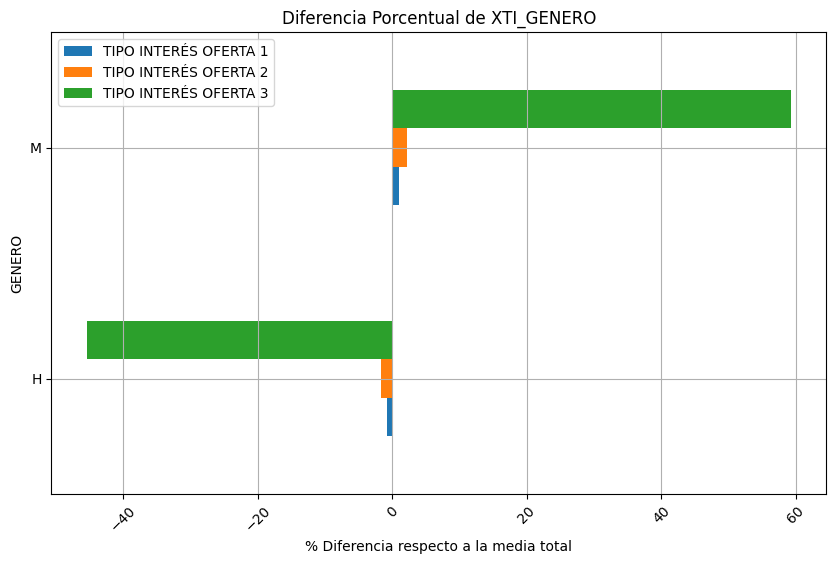

In [10]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

# Lista que contiene el nombre de cada oferta
ofertas = ['TIPO INTERÉS OFERTA 1', 'TIPO INTERÉS OFERTA 2', 'TIPO INTERÉS OFERTA 3']

# Calculando las medias para cada variable y oferta
group_means = df.groupby('XTI_GENERO')[ofertas].mean()
print(f"Media de ofertas por {'XTI_GENERO'}:")
display(group_means)
# Cálculo de diferencias porcentuales
total_means = df[ofertas].mean()
pct_difference = (group_means - total_means) / total_means * 100
print(f"Diferencia porcentual de ofertas por {'XTI_GENERO'} respecto al total:")
display(pct_difference)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
pct_difference.plot.barh(ax=ax)
plt.title(f"Diferencia Porcentual de {'XTI_GENERO'}")
plt.ylabel('GENERO')
plt.xlabel('% Diferencia respecto a la media total')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### SESGO POR NACIONALIDAD

,NACIONALIDAD
COD_NACIONALIDAD,
1,ESP
2,USA
3,ITA
4,FRA
5,ALE
6,MEX
7,UK
8,POR
9,PER


Media de ofertas por NACIONALIDAD:


,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3
NACIONALIDAD,,,
1,1.119420,0.586667,0.727681
2,1.168933,0.609200,0.872800
3,1.130000,0.642632,0.738421
4,1.151129,0.575323,0.808548
5,1.062037,0.663519,0.729630
6,1.056250,0.572812,0.736719
7,1.162344,0.600938,0.762656
8,1.033200,0.540933,0.789733
9,0.979762,0.664762,0.808810


Diferencia porcentual de ofertas por NACIONALIDAD respecto al total:


,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3
NACIONALIDAD,,,
1,0.366689,3.120706,-2.984120
2,4.806005,7.081478,16.363409
3,1.315261,12.957878,-1.552256
4,3.209680,1.126711,7.797258
5,-4.778266,16.629258,-2.724346
6,-5.297129,0.685504,-1.779210
7,4.215186,5.629146,1.678828
8,-7.363781,-4.918022,5.288798
9,-12.155015,16.847813,7.832073


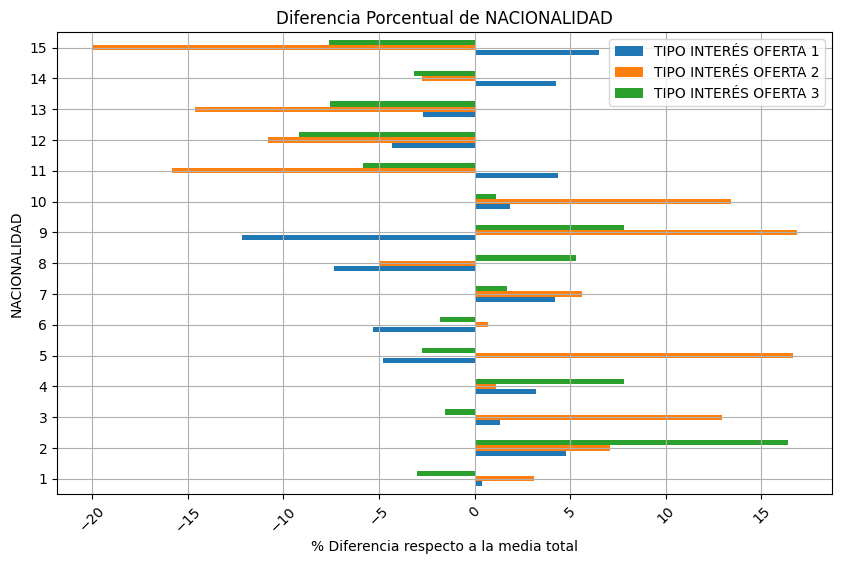

In [11]:
# YOUR CODE HERE
# Lista que contiene el nombre de cada oferta
ofertas = ['TIPO INTERÉS OFERTA 1', 'TIPO INTERÉS OFERTA 2', 'TIPO INTERÉS OFERTA 3']
catalogo=pd.read_excel("C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/datos/006/CATÁLOGO(1).xlsx")
catalogo.set_index('COD_NACIONALIDAD',inplace=True)
catalogo
display(catalogo)

# Calculando las medias para cada variable y oferta
group_means = df.groupby('NACIONALIDAD')[ofertas].mean()
print(f"Media de ofertas por {'NACIONALIDAD'}:")
display(group_means)
# Cálculo de diferencias porcentuales
total_means = df[ofertas].mean()
pct_difference = (group_means - total_means) / total_means * 100
print(f"Diferencia porcentual de ofertas por {'NACIONALIDAD'} respecto al total:")
display(pct_difference)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
pct_difference.plot.barh(ax=ax)
plt.title(f"Diferencia Porcentual de {'NACIONALIDAD'}")
plt.ylabel('NACIONALIDAD')
plt.xlabel('% Diferencia respecto a la media total')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### SESGO POR TENENCIA DE NÓMINA

Media de ofertas por TENENCIA_NOMINA:


,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3
TENENCIA_NOMINA,,,
False,1.509243,0.523712,0.777589
True,0.791786,0.606039,0.727456


Diferencia porcentual de ofertas por TENENCIA_NOMINA respecto al total:


,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3
TENENCIA_NOMINA,,,
False,35.318053,-7.945157,3.669645
True,-29.008808,6.525828,-3.014097


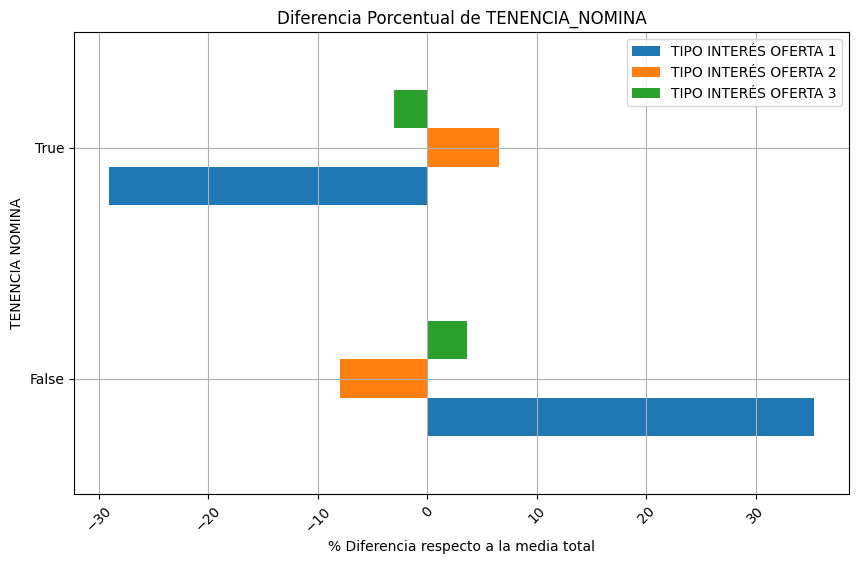

In [12]:
# YOUR CODE HERE
# Lista que contiene el nombre de cada oferta
ofertas = ['TIPO INTERÉS OFERTA 1', 'TIPO INTERÉS OFERTA 2', 'TIPO INTERÉS OFERTA 3']

# Calculando las medias para cada variable y oferta
group_means = df.groupby('TENENCIA_NOMINA')[ofertas].mean()
print(f"Media de ofertas por {'TENENCIA_NOMINA'}:")
display(group_means)
# Cálculo de diferencias porcentuales
total_means = df[ofertas].mean()
pct_difference = (group_means - total_means) / total_means * 100
print(f"Diferencia porcentual de ofertas por {'TENENCIA_NOMINA'} respecto al total:")
display(pct_difference)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
pct_difference.plot.barh(ax=ax)
plt.title(f"Diferencia Porcentual de {'TENENCIA_NOMINA'}")
plt.ylabel('TENENCIA NOMINA')
plt.xlabel('% Diferencia respecto a la media total')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### SESGO POR MOROSIDAD

Media de ofertas por XSN_ASNEF:


,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3
XSN_ASNEF,,,
N,1.119074,0.507179,0.7489
S,0.943500,3.402500,0.8035


Diferencia porcentual de ofertas por XSN_ASNEF respecto al total:


,TIPO INTERÉS OFERTA 1,TIPO INTERÉS OFERTA 2,TIPO INTERÉS OFERTA 3
XSN_ASNEF,,,
N,0.335648,-10.851216,-0.155211
S,-15.406240,498.070797,7.124197


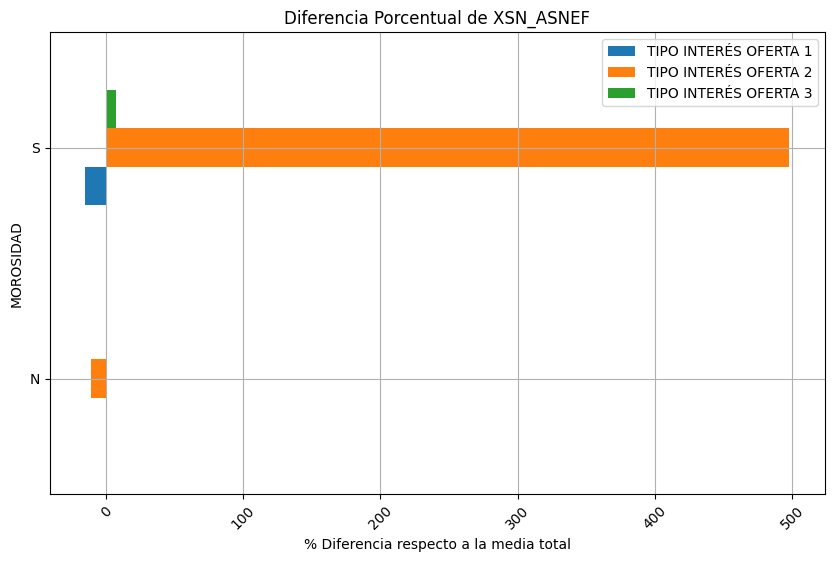

In [13]:
# YOUR CODE HERE
# Lista que contiene el nombre de cada oferta
ofertas = ['TIPO INTERÉS OFERTA 1', 'TIPO INTERÉS OFERTA 2', 'TIPO INTERÉS OFERTA 3']

# Calculando las medias para cada variable y oferta
group_means = df.groupby('XSN_ASNEF')[ofertas].mean()
print(f"Media de ofertas por {'XSN_ASNEF'}:")
display(group_means)
# Cálculo de diferencias porcentuales
total_means = df[ofertas].mean()
pct_difference = (group_means - total_means) / total_means * 100
print(f"Diferencia porcentual de ofertas por {'XSN_ASNEF'} respecto al total:")
display(pct_difference)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
pct_difference.plot.barh(ax=ax)
plt.title(f"Diferencia Porcentual de {'XSN_ASNEF'}")
plt.ylabel('MOROSIDAD')
plt.xlabel('% Diferencia respecto a la media total')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Explicación de los resultados

### Gráfico Diferencia Porcentual de XTI_GENERO"
#### - Para el género femenino (M), las ofertas tienen un interés mayor con respecto a la media, siendo la oferta 3 con mayor variación.
#### - Para el género masculino (H), las ofertas tienen un interés menor respecto a la media, mientras que la oferta 3 con mayor variación.
#### - Se concluye que la oferta 3 es la que mayor sesgo tiene ya que a los hombres les otorga un interés muy por debajo de la media, mientras que a las mujeres un interés muy alto con respecto a la media.

### Gráfico Diferencia Porcentual de NACIONALIDAD"
#### - Para los clientes provenientes de España (Nacionalidad 1), el interés de la oferta 2 es mayor con respecto a la media significativamente y la oferta 3 es menor con respecto a la media significativamente.
#### - Para los clientes provenientes de EEUU (Nacionalidad 2), el interés de las tres ofertas es mayor con respecto a la media significativamente.
#### - Para los clientes provenientes de Italia (Nacionalidad 3), el interés de la oferta 2 es mayor con respecto a la media significativamente.
#### - Para los clientes provenientes de Francia (Nacionalidad 4), el interés de la oferta 1 y 3 son mayor con respecto a la media significativamente.
#### - Para los clientes provenientes de Alemania (Nacionalidad 5), el interés de la oferta 1 y 3 son menor con respecto a la media significativamente, pero la oferta 2 es mayor que la media significativamente.
#### - Para los clientes provenientes de México (Nacionalidad 6), el interés de la oferta 1 y 3 menor con respecto a la media significativamente.
#### - Para los clientes provenientes de Reino Unido (Nacionalidad 7), el interés de la oferta 1 y 2 son mayor con respecto a la media significativamente.
#### - Para los clientes provenientes de Portugal (Nacionalidad 8), el interés de la oferta 1 y 2 son menor con respecto a la media significativamente, pero la oferta 3 es mayor que la media significativamente.
#### - Para los clientes provenientes de Perú (Nacionalidad 9), el interés de la oferta 2 y 3 son mayor con respecto a la media significativamente, pero la oferta 3 es menor que la media significativamente.
#### - Para los clientes provenientes de Colombia (Nacionalidad 10), el interés de la oferta 2 es mayor con respecto a la media significativamente.
#### - Para los clientes provenientes de Brasil (Nacionalidad 11), el interés de la oferta 2 y 3 son menor con respecto a la media significativamente, pero la oferta 1 es mayor que la media significativamente.
#### - Para los clientes provenientes de Chile (Nacionalidad 12), el interés de las tres ofertas son menor con respecto a la media significativamente.
#### - Para los clientes provenientes de Bolivia (Nacionalidad 13), el interés de las tres ofertas son menor con respecto a la media significativamente.
#### - Para los clientes provenientes de Ecuador (Nacionalidad 14), el interés de la oferta 2 y 3 son menor con respecto a la media significativamente, pero la oferta 1 es mayor que la media significativamente.
#### - Para los clientes provenientes de Chile (Nacionalidad 15), el interés de la oferta 2 y 3 son menor con respecto a la media significativamente, pero la oferta 1 es mayor que la media significativamente.
#### - Se concluye que las ofertas tiene un sesgo significativo positivo para los paises como EEUU, Francia, Reino Unido y Colombia pero un sesgo negativo para los paises como Brasil, Chile, Bolivia.

### Gráfico Diferencia Porcentual de Tenencia de Nómina"
#### - Para los clientes que cuentan con nómina, la ofertas 1 tiene un interés menor significativo con respecto a la media.
#### - Para los clientes que no cuentan con nómina, la ofertas 1 tiene un interés mayor significativo respecto a la media.
#### - Se concluye que la oferta 1 tiene un sesgo significativo en función a si el ciente cuenta con una nómina o no.

### Gráfico Diferencia Porcentual de Morosidad"
#### - Para los clientes que cuentan con morosidad, la ofertas 2 tiene un interés mayor significativo con respecto a la media.

